In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'

In [3]:
!wget $data

--2025-11-03 15:26:34--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.1’

CreditScoring.csv.1 100%[===================>] 178.21K  --.-KB/s    in 0.004s  

2025-11-03 15:26:34 (40.4 MB/s) - ‘CreditScoring.csv.1’ saved [182489/182489]



In [4]:
!head CreditScoring.csv

"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
1,0,1,36,26,1,1,1,46,107,0,0,310,910
1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
1,9,5,12,27,1,1,1,35,80,0,0,200,1093
1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957


In [5]:
df = pd.read_csv(data)

In [6]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [7]:
df.columns = df.columns.str.lower()

In [8]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)

In [9]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [10]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [11]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [12]:
for col in ["income", "assets", "debt"]:
    df[col] = df[col].replace(to_replace=99999999, value=np.nan)

In [13]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4421.000000,4408.000000,4437.000000,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,130.568197,5403.433984,342.948614,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,86.367434,11573.161523,1245.861736,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   status     4455 non-null   object 
 1   seniority  4455 non-null   int64  
 2   home       4455 non-null   object 
 3   time       4455 non-null   int64  
 4   age        4455 non-null   int64  
 5   marital    4455 non-null   object 
 6   records    4455 non-null   object 
 7   job        4455 non-null   object 
 8   expenses   4455 non-null   int64  
 9   income     4421 non-null   float64
 10  assets     4408 non-null   float64
 11  debt       4437 non-null   float64
 12  amount     4455 non-null   int64  
 13  price      4455 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 487.4+ KB


In [15]:
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [16]:
df = df[df.status != "unk"].reset_index(drop=True)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = (df_train.status == "default").astype("int").values
y_val = (df_val.status == "default").astype("int").values
y_test = (df_test.status == "default").astype("int").values

In [21]:
del df_train["status"]
del df_val["status"]
del df_test["status"]

In [22]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


## **6.3 Decision trees**

In [23]:
def assess_risk(client):
    if client["records"] == "yes":
        if client["job"] == "parttime":
            return "default"
        else:
            return "ok"

    else:
        if client["assets"] > 6000:
            return "ok"
        else:
            return "default"

In [24]:
xi = df_train.iloc[0].to_dict()

In [25]:
assess_risk(xi)

'ok'

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [27]:
train_dicts = df_train.fillna(0).to_dict(orient="records")

In [28]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [29]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [30]:
val_dicts = df_val.fillna(0).to_dict(orient="records")
X_val = dv.transform(val_dicts)

In [31]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [32]:
roc_auc_score(y_val, y_pred)

0.6610308541812986

In [33]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

Retrain the tree but with less depth.

In [34]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
print(f"AUC train = {roc_auc_score(y_train, y_pred)}")

y_pred = dt.predict_proba(X_val)[:, 1]
print(f"AUC val = {roc_auc_score(y_val, y_pred)}")

AUC train = 0.7761016984958594
AUC val = 0.7389079944782155


In [35]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
print(f"AUC train = {roc_auc_score(y_train, y_pred)}")

y_pred = dt.predict_proba(X_val)[:, 1]
print(f"AUC val = {roc_auc_score(y_val, y_pred)}")

AUC train = 0.6282660131823559
AUC val = 0.6058644740984719


In [36]:
from sklearn.tree import export_text

In [37]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=yes <= 0.50
|   |--- class: 0
|--- records=yes >  0.50
|   |--- class: 1



In [38]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
print(f"AUC train = {roc_auc_score(y_train, y_pred)}")

y_pred = dt.predict_proba(X_val)[:, 1]
print(f"AUC val = {roc_auc_score(y_val, y_pred)}")

AUC train = 0.7054989859726213
AUC val = 0.6685264343319367


In [39]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



## **6.4 Decision tree learning**

In [40]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=["assets", "status"])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [41]:
df_example.sort_values("assets")

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
4,5000,ok
3,5000,ok
0,8000,default
6,9000,ok


In [42]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [43]:
from IPython.display import display

In [44]:
for T in Ts:
    print(T)
    df_left = df_example[df_example["assets"] <= T]
    df_right = df_example[df_example["assets"] > T]

    display(df_left)
    display(df_right)


0


,assets,status
2,0,default


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


2000


,assets,status
1,2000,default
2,0,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


3000


,assets,status
1,2000,default
2,0,default
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


,assets,status
0,8000,default
6,9000,ok


8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


,assets,status
6,9000,ok


In [45]:
for T in Ts:
    print(T)
    df_left = df_example[df_example["assets"] <= T]
    df_right = df_example[df_example["assets"] > T]

    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

    print()


0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64



In [46]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000, 500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=["assets", "debt", "status"])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [47]:
df_example.sort_values("debt")

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
3,5000,1000,ok
2,0,1000,default
5,4000,1000,ok
4,5000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [48]:
thresholds = {
    "assets": [0, 2000, 3000, 4000, 5000, 8000],
    "debt": [500, 1000, 2000]
}

In [49]:
for feature, Ts, in thresholds.items():
    print("##########################")
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]
    
        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))
    
        print()

    print("##########################")

##########################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

##########################
##########################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

##########################


For each feature, find all thresholds, iterate over them, and calculate impurity of the split. Select feature that yields the lowest impurity.

Criteria for not splitting further:
- Group already pure
- Tree reached depth limit
- Group too small to split

**Decision tree learning algorithm:**
1. Find the best split
2. Stop if max_depth is reached
3. For each dataset after splitting, if the dataset is sufficiently large and not pure, repeat the algorithm on that dataset

## **6.5 Decision trees parameter tuning**

``DecisionTreeClassifier()`` has many parameters. The two most important ones are ``max_depth`` and ``min_samples_leaf``. But there are many others.

In [50]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print(f"{str(d):4s} -> {auc:.3f}")

1    -> 0.606
2    -> 0.669
3    -> 0.739
4    -> 0.761
5    -> 0.766
6    -> 0.746
10   -> 0.681
15   -> 0.663
20   -> 0.649
None -> 0.659


In [51]:
scores = []

for d in [None, 4, 5, 6, 7, 10, 15, 20]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
    
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        # print(f"{str(d):1s}, {str(s):3} -> {auc:.3f}")

        scores.append((d, s, auc))

In [52]:
df_scores = pd.DataFrame(scores, columns=["max_depth", "min_samples_leaf", "auc"])
df_scores.head()

,max_depth,min_samples_leaf,auc
0,NaN,1,0.667839
1,NaN,2,0.682095
2,NaN,5,0.717644
3,NaN,10,0.761159
4,NaN,15,0.785919


In [53]:
df_scores.sort_values(by="auc", ascending=False)

,max_depth,min_samples_leaf,auc
49,10.0,15,0.790811
58,15.0,15,0.787514
67,20.0,15,0.787196
4,NaN,15,0.785919
50,10.0,20,0.785525
...,...,...,...
53,10.0,500,0.679842
62,15.0,500,0.679842
0,NaN,1,0.667839
54,15.0,1,0.666659


In [54]:
df_scores_pivot = df_scores.pivot(index="min_samples_leaf", columns=["max_depth"], values=["auc"])
df_scores_pivot

auc                                                    \
max_depth              NaN      4.0       5.0       6.0       7.0       10.0   
min_samples_leaf                                                               
1                 0.667839  0.761283  0.766496  0.758313  0.746715  0.690432   
2                 0.682095  0.761283  0.766938  0.766696  0.762990  0.710824   
5                 0.717644  0.761283  0.767755  0.761225  0.754829  0.723765   
10                0.761159  0.761283  0.762276  0.778299  0.763729  0.772680   
15                0.785919  0.763726  0.771806  0.785250  0.779580  0.790811   
20                0.782171  0.760910  0.774028  0.773337  0.778790  0.785525   
100               0.779474  0.755937  0.763384  0.776434  0.779583  0.779725   
200               0.768479  0.747260  0.759073  0.768267  0.768479  0.768479   
500               0.679842  0.679842  0.679842  0.679842  0.679842  0.679842   

                                      
max_depth             15.0      20.0  
min_samples_leaf                      
1                 0.666659  0.656124  
2                 0.686608  0.685933  
5                 0.708469  0.722034  
10                0.763562  0.759893  
15                0.787514  0.787196  
20                0.784396  0.781269  
100               0.779474  0.779725  
200               0.768479  0.768479  
500               0.679842  0.679842

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

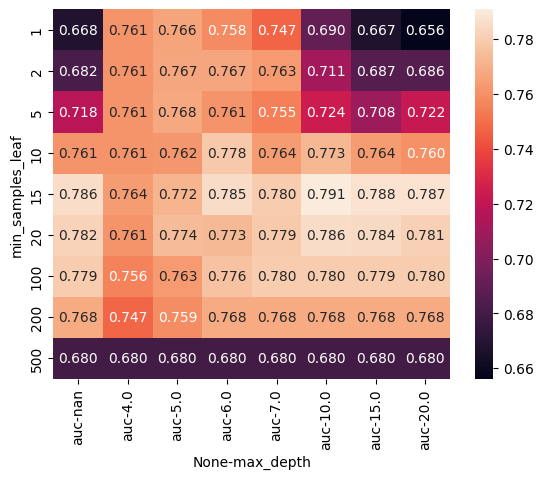

In [55]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

Although the auc score is good for the ``min_samples_leaf = 15`` with no ``max_depth``, it is risky to not limit the depth. Going for a low ``max_depth`` makes it easier to understand the tree, therefore we pick ``max_depth = 6`` and ``min_samples_leaf = 15``

In [56]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## **6.6 Ensembles and random forest**

We create multiple decision trees, whereby each decision tree is built based on a randomly selected subset of the available features.

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [59]:
y_pred = rf.predict_proba(X_val)[:, 1]

In [60]:
roc_auc_score(y_val, y_pred)

0.7744726453706618

In [61]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

In [62]:
df_scores = pd.DataFrame(scores, columns=["n_estimators", "auc"])

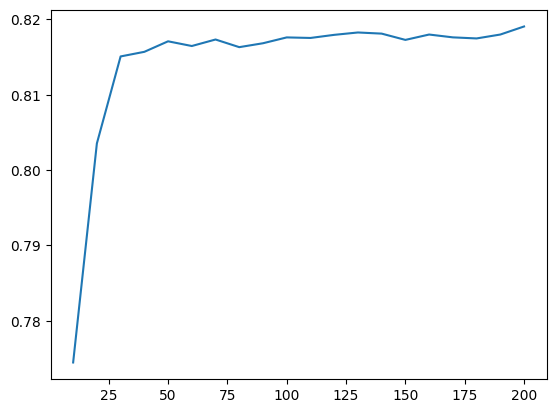

In [63]:
plt.plot(df_scores["n_estimators"], df_scores["auc"])

In [64]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(
            n_estimators=n, max_depth=d, random_state=1
        )
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

In [65]:
df_scores = pd.DataFrame(scores, columns=["max_depth", "n_estimators", "auc"])
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


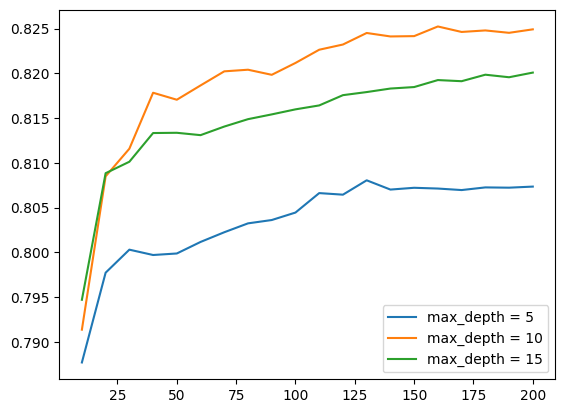

In [66]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores["max_depth"] == d]
    plt.plot(df_subset["n_estimators"], df_subset["auc"], label=f"max_depth = {d}")

plt.legend()

In [67]:
max_depth = 10

In [68]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(
            n_estimators=n, max_depth=max_depth, min_samples_leaf=s, random_state=1
        )
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

In [69]:
df_scores = pd.DataFrame(scores, columns=["min_samples_leaf", "n_estimators", "auc"])
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.791365
1,1,20,0.808496
2,1,30,0.811584
3,1,40,0.817839
4,1,50,0.817058


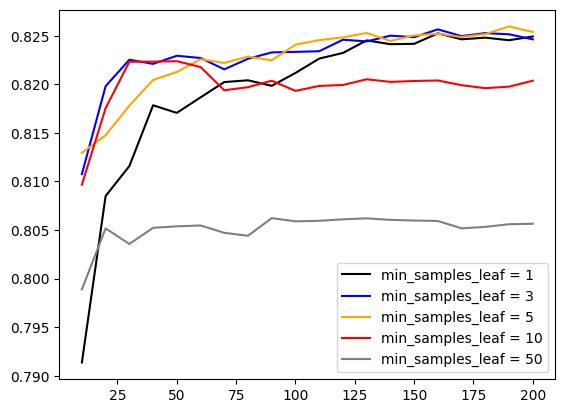

In [70]:
colors = ["black", "blue", "orange", "red", "grey"]
min_samples_leaf_values = [1, 3, 5, 10, 50]

for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores["min_samples_leaf"] == s]
    plt.plot(
        df_subset["n_estimators"],
        df_subset["auc"], 
        color=col,
        label=f"min_samples_leaf = {s}")

plt.legend()

In [71]:
min_samples_leaf = 3

In [72]:
n_estimators = 100

In [73]:
rf = RandomForestClassifier(
    n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=s, random_state=1
)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,50
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## **6.7 Gradient boosting and XGBoost**

In [74]:
!pip install xgboost


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [75]:
import xgboost as xgb

In [76]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [77]:
xgb_params = {
    "eta": 0.3,  # Learning rate
    "max_depth": 6,  # Size of trees
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [78]:
y_pred = model.predict(dval)

In [79]:
roc_auc_score(y_val, y_pred)

0.8118506454190986

In [80]:
watchlist = [(dtrain, "train"), (dval, "val")]

In [81]:
%%capture output

xgb_params = {
    "eta": 0.3,  # Learning rate
    "max_depth": 6,  # Size of trees
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [82]:
print(output.stdout)

[0]	train-auc:0.86653	val-auc:0.77999
[5]	train-auc:0.92969	val-auc:0.80822
[10]	train-auc:0.95512	val-auc:0.81115
[15]	train-auc:0.96767	val-auc:0.81993
[20]	train-auc:0.97648	val-auc:0.81877
[25]	train-auc:0.98248	val-auc:0.81520
[30]	train-auc:0.98844	val-auc:0.81613
[35]	train-auc:0.99244	val-auc:0.81453
[40]	train-auc:0.99393	val-auc:0.81407
[45]	train-auc:0.99568	val-auc:0.81392
[50]	train-auc:0.99723	val-auc:0.81276
[55]	train-auc:0.99804	val-auc:0.81299
[60]	train-auc:0.99861	val-auc:0.81244
[65]	train-auc:0.99916	val-auc:0.81197
[70]	train-auc:0.99962	val-auc:0.81243
[75]	train-auc:0.99975	val-auc:0.81152
[80]	train-auc:0.99989	val-auc:0.81359
[85]	train-auc:0.99993	val-auc:0.81193
[90]	train-auc:0.99998	val-auc:0.81038
[95]	train-auc:0.99999	val-auc:0.80871
[100]	train-auc:0.99999	val-auc:0.80842
[105]	train-auc:1.00000	val-auc:0.80778
[110]	train-auc:1.00000	val-auc:0.80764
[115]	train-auc:1.00000	val-auc:0.80722
[120]	train-auc:1.00000	val-auc:0.80750
[125]	train-auc:1.0000

In [83]:
s = output.stdout

In [84]:
line = s.split("\n")[0]

In [85]:
line.split("\t")

['[0]', 'train-auc:0.86653', 'val-auc:0.77999']

In [86]:
num_iter, train_auc, val_auc = line.split("\t")

In [87]:
int(num_iter.strip("[]"))

0

In [88]:
train_auc.split(":")[1]

'0.86653'

In [89]:
val_auc.split(":")[1]

'0.77999'

In [90]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.split("\n"):
        if line != "":
            it_line, train_line, val_line = line.split("\t")
    
            it = int(it_line.strip("[]"))
            train = float(train_line.split(":")[1])
            val = float(val_line.split(":")[1])
    
            results.append((it, train, val))

    columns=["num_iter", "train_auc", "val_auc"]
    df_results = pd.DataFrame(results, columns=columns)
    return df_results


In [91]:
df_score = parse_xgb_output(output)

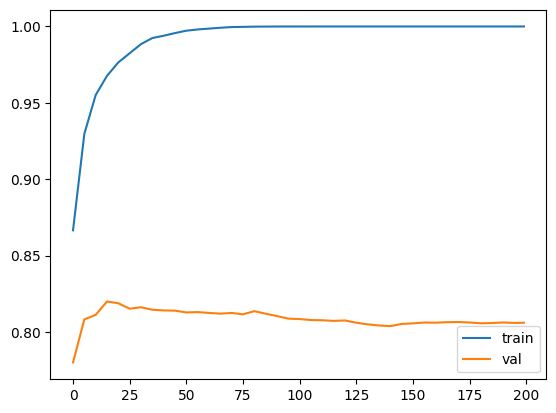

In [92]:
plt.plot(df_score["num_iter"], df_score["train_auc"], label="train")
plt.plot(df_score["num_iter"], df_score["val_auc"], label="val")
plt.legend()

## **6.8 XGBoost parameter boosting**

In [93]:
%%capture output

xgb_params = {
    "eta": 0.1,
    "max_depth": 3,
    "min_child_weight": 30,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [94]:
scores = {}

In [95]:
key = f"eta={xgb_params["eta"]}"
scores[key] = parse_xgb_output(output)
scores

{'eta=0.1':     num_iter  train_auc  val_auc
 0          0    0.76455  0.73369
 1          5    0.82726  0.77541
 2         10    0.84502  0.79427
 3         15    0.85474  0.80435
 4         20    0.86152  0.81053
 5         25    0.86732  0.81581
 6         30    0.87184  0.81915
 7         35    0.87493  0.82114
 8         40    0.87793  0.82381
 9         45    0.87926  0.82523
 10        50    0.88136  0.82604
 11        55    0.88327  0.82745
 12        60    0.88405  0.82832
 13        65    0.88528  0.82852
 14        70    0.88617  0.82918
 15        75    0.88748  0.83097
 16        80    0.88868  0.83113
 17        85    0.88976  0.83171
 18        90    0.89066  0.83221
 19        95    0.89119  0.83255
 20       100    0.89206  0.83245
 21       105    0.89291  0.83352
 22       110    0.89374  0.83344
 23       115    0.89461  0.83373
 24       120    0.89519  0.83397
 25       125    0.89598  0.83459
 26       130    0.89650  0.83455
 27       135    0.89692  0.83471
 28

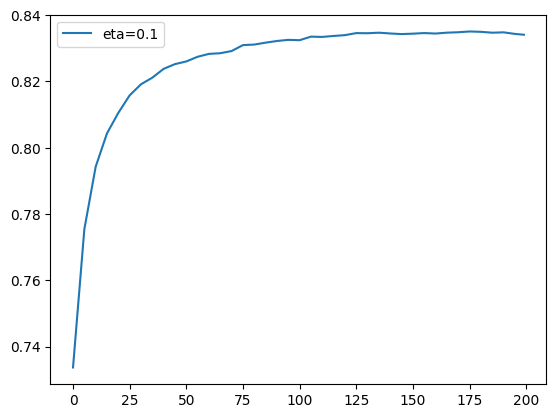

In [96]:
for key, df_scores in scores.items():
    plt.plot(df_scores["num_iter"], df_scores["val_auc"], label=key)

plt.legend()

In [97]:
key = f"max_depth={xgb_params["max_depth"]}"
scores[key] = parse_xgb_output(output)
scores

{'eta=0.1':     num_iter  train_auc  val_auc
 0          0    0.76455  0.73369
 1          5    0.82726  0.77541
 2         10    0.84502  0.79427
 3         15    0.85474  0.80435
 4         20    0.86152  0.81053
 5         25    0.86732  0.81581
 6         30    0.87184  0.81915
 7         35    0.87493  0.82114
 8         40    0.87793  0.82381
 9         45    0.87926  0.82523
 10        50    0.88136  0.82604
 11        55    0.88327  0.82745
 12        60    0.88405  0.82832
 13        65    0.88528  0.82852
 14        70    0.88617  0.82918
 15        75    0.88748  0.83097
 16        80    0.88868  0.83113
 17        85    0.88976  0.83171
 18        90    0.89066  0.83221
 19        95    0.89119  0.83255
 20       100    0.89206  0.83245
 21       105    0.89291  0.83352
 22       110    0.89374  0.83344
 23       115    0.89461  0.83373
 24       120    0.89519  0.83397
 25       125    0.89598  0.83459
 26       130    0.89650  0.83455
 27       135    0.89692  0.83471
 28

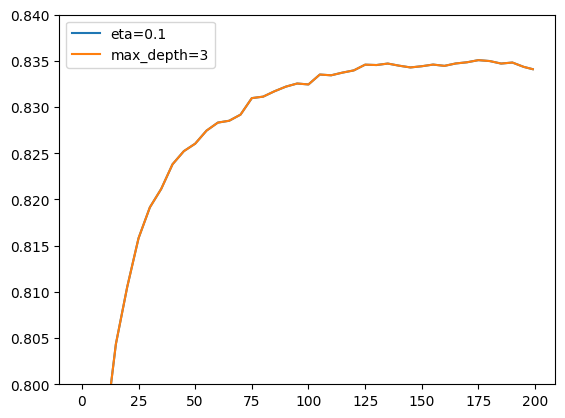

In [98]:
for key, df_scores in scores.items():
    plt.plot(df_scores["num_iter"], df_scores["val_auc"], label=key)

plt.ylim(0.8, 0.84)
plt.legend()

In [99]:
key = f"min_child_weight={xgb_params["min_child_weight"]}"
scores[key] = parse_xgb_output(output)
scores

{'eta=0.1':     num_iter  train_auc  val_auc
 0          0    0.76455  0.73369
 1          5    0.82726  0.77541
 2         10    0.84502  0.79427
 3         15    0.85474  0.80435
 4         20    0.86152  0.81053
 5         25    0.86732  0.81581
 6         30    0.87184  0.81915
 7         35    0.87493  0.82114
 8         40    0.87793  0.82381
 9         45    0.87926  0.82523
 10        50    0.88136  0.82604
 11        55    0.88327  0.82745
 12        60    0.88405  0.82832
 13        65    0.88528  0.82852
 14        70    0.88617  0.82918
 15        75    0.88748  0.83097
 16        80    0.88868  0.83113
 17        85    0.88976  0.83171
 18        90    0.89066  0.83221
 19        95    0.89119  0.83255
 20       100    0.89206  0.83245
 21       105    0.89291  0.83352
 22       110    0.89374  0.83344
 23       115    0.89461  0.83373
 24       120    0.89519  0.83397
 25       125    0.89598  0.83459
 26       130    0.89650  0.83455
 27       135    0.89692  0.83471
 28

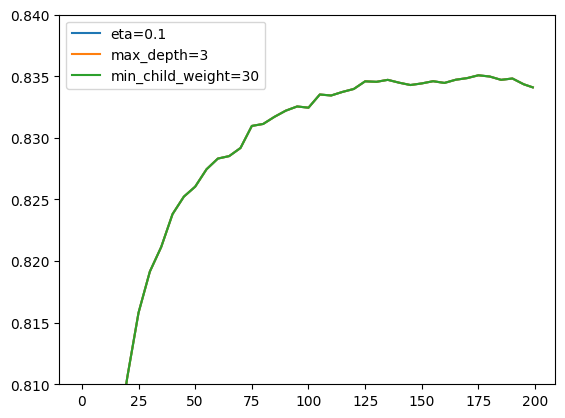

In [100]:
for key, df_scores in scores.items():
    plt.plot(df_scores["num_iter"], df_scores["val_auc"], label=key)

plt.ylim(0.81, 0.84)
plt.legend()

In [101]:
%%capture output

xgb_params = {
    "eta": 0.1,
    "max_depth": 3,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175, verbose_eval=5, evals=watchlist)

Other useful parameters:
- ``subsample`` and ``colsample_bytree``
- ``lambda`` and ``alpha``

## **6.9 Selecting the final model**

In [102]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7848562640769174

In [103]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8058929306628564

In [104]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8334715797631446

In [105]:
df_full_train = df_full_train.reset_index(drop=True)

In [106]:
y_full_train = (df_full_train.status == "default").astype(int).values

In [107]:
del df_full_train["status"]

In [116]:
dicts_full_train = df_full_train.to_dict(orient="records")

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient="records")
X_test = dv.transform(dicts_test)

In [117]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=list(dv.get_feature_names_out()))
dtest = xgb.DMatrix(X_test, feature_names=list(dv.get_feature_names_out()))

In [123]:
xgb_params = {
    "eta": 0.1,
    "max_depth": 3,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [124]:
y_pred = model.predict(dtest)

In [125]:
roc_auc_score(y_test, y_pred)

0.8299814280826938